

#Part 1:

### Importing dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!pip install torch torchvision


Mounted at /content/gdrive
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━

# Fashion MNIST Dataset Project

##*Introduction*

The Fashion MNIST dataset consists of 70,000 28x28 grayscale images in 10 different classes, with 7,000 images per class. There are 60,000 training images and 10,000 test images.

The labels our models will be predicting are the classes, hence we are dealing with a multiclass classification problem. We shall split the dataset for training and testing with the current structure of the dataset, meaning 80/20 train test split. (As there are 60,000 train images and 10,000 test images).

Below we shall show the following in regards to obtaining the dataset successfully:

The dataset's shape
Some sample images of the data
The class distribution in the training and testing set

###We will be foucusing on the following qestions:

# Our Qeustions

a) What is the distribution of the 10 classes in the dataset?

b) How do simple models perform on this dataset?

c) Can more complex models improve the classification accuracy?

d) What are the trade-offs between different models?

e) What are the most common misclassifications made by the models?

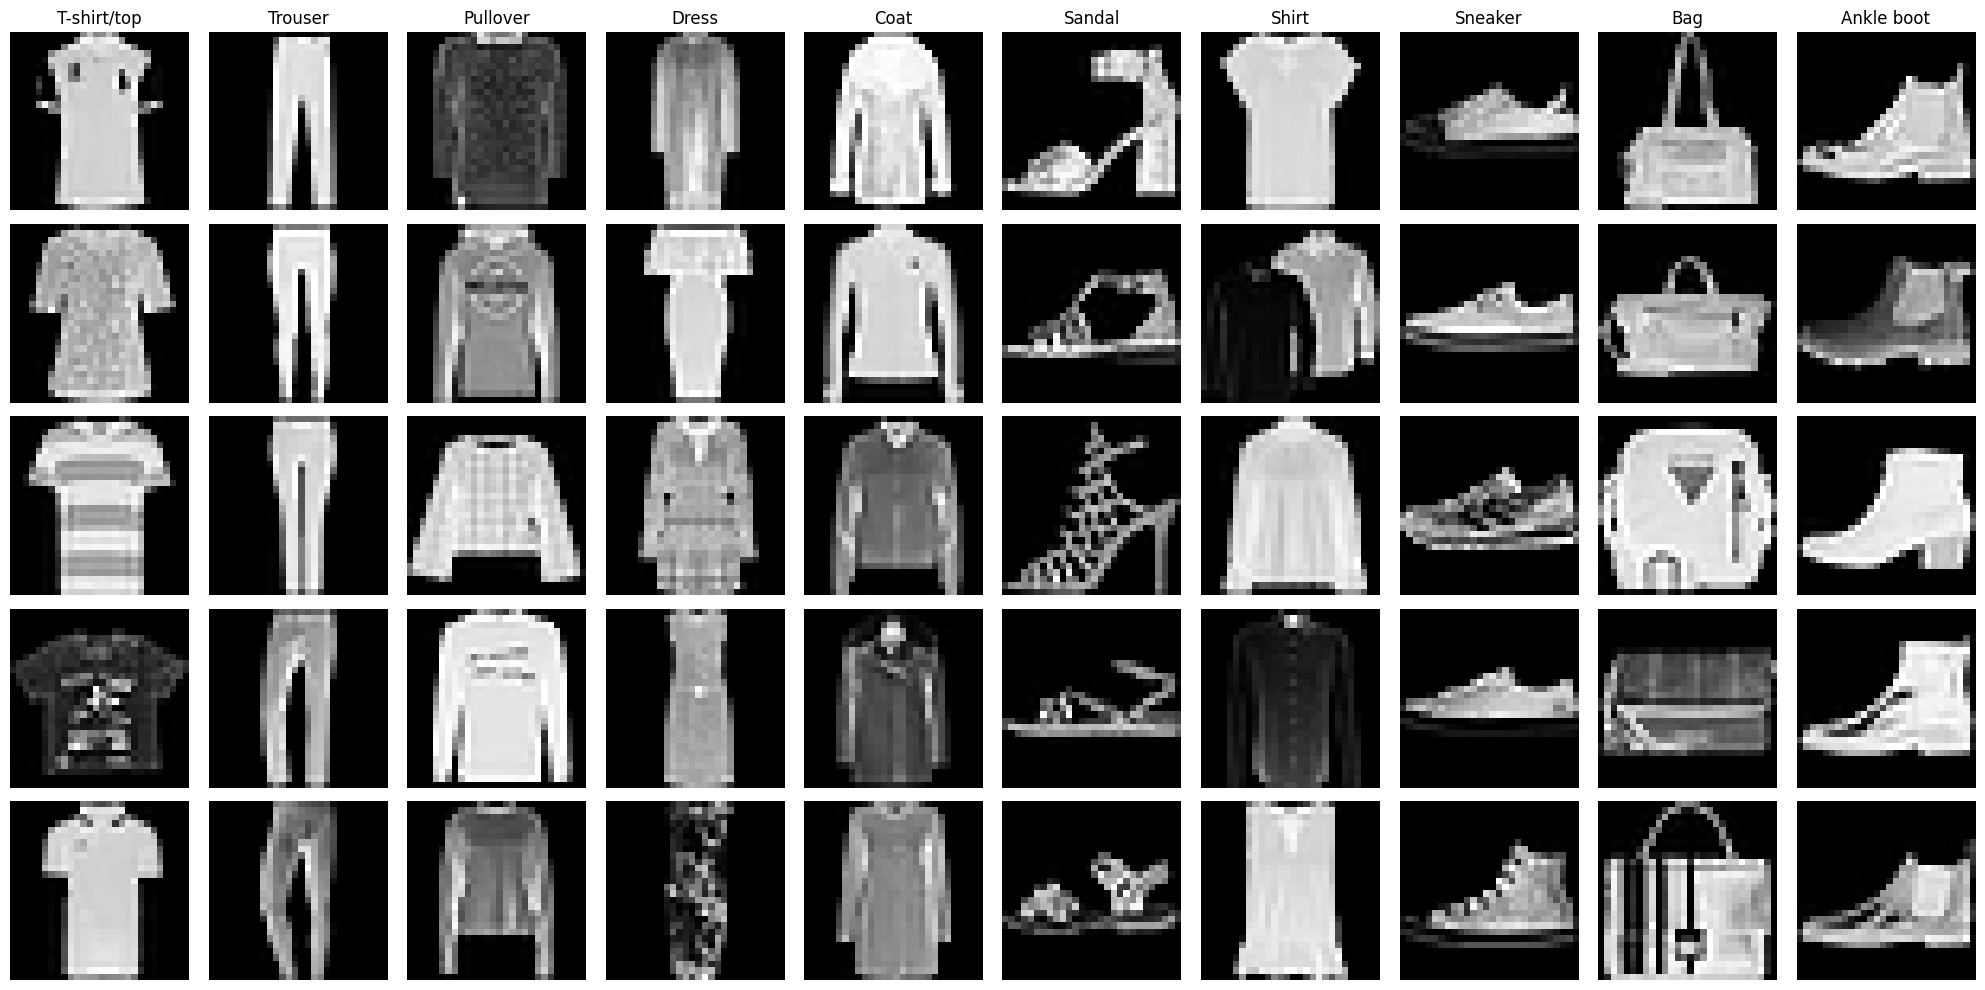

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Define the classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Transform data into tensors and normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)

# Visualize some examples from the dataset
num_classes = len(classes)
samples_per_class = 5

# Create a figure and subplots
fig, axes = plt.subplots(samples_per_class, num_classes, figsize=(num_classes * 2, samples_per_class * 2))

for y, cls in enumerate(classes):
    # Get indices of images belonging to class y
    idxs = [idx for idx, label in enumerate(trainset.targets) if label == y]
    idxs = np.random.choice(idxs, samples_per_class, replace=False)

    for i, idx in enumerate(idxs):
        img, _ = trainset[idx]  # Get image and label
        img = img.permute(1, 2, 0)  # Change to channels-last format
        img = img.numpy()  # Convert to numpy array
        img = (img - img.min()) / (img.max() - img.min())  # Normalize pixel values
        ax = axes[i, y]  # Get the subplot corresponding to this image
        ax.imshow(img.squeeze(), cmap='gray')  # Display the image
        ax.axis('off')  # Turn off axis
        if i == 0:
            ax.set_title(cls)  # Set title for the first row

plt.tight_layout()  # Adjust layout
plt.show()


## Class distrubution in traning set:

one can see that the data is distrubuted evenly with the same amount of images per class, in the training and testing data

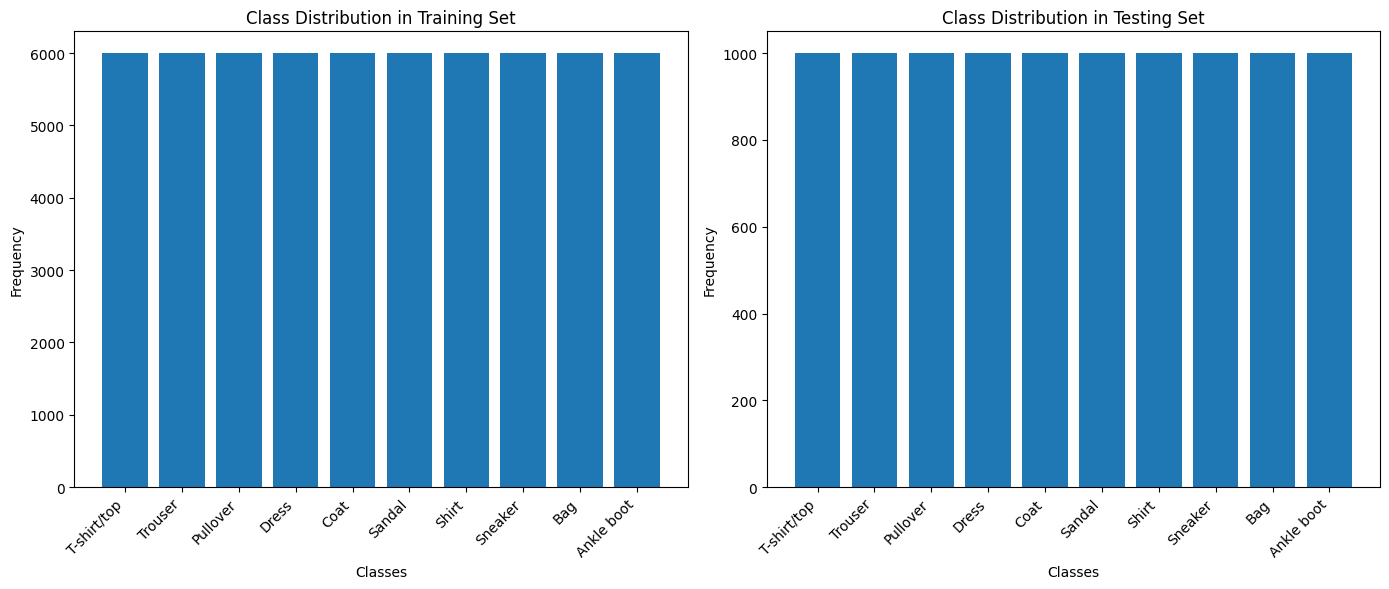

In [ ]:
# Define the classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Transform data into tensors and normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)

# Plotting the distribution of classes
def plot_class_distribution(dataset, dataset_name, position):
    class_counts = np.bincount(dataset.targets)
    num_classes = len(class_counts)

    plt.subplot(1, 2, position)
    plt.bar(range(num_classes), class_counts, tick_label=classes)
    plt.title(f'Class Distribution in {dataset_name} Set')
    plt.xlabel('Classes')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Create a figure with two subplots
plt.figure(figsize=(14, 6))

# Plot class distribution for training and testing sets
plot_class_distribution(trainset, 'Training', 1)
plot_class_distribution(testset, 'Testing', 2)

plt.show()

#Part 2:

Our work in the follwing part involes our implementation of variouse models and how they compare to each. we tackel this problem by starting with initial attempts of simple models and building up apon them. we will disscuse how we improve our results

### Our models
- Dummy Classifier
- Perceptron
- Logistic regression
- KNN
- SVM
- CNN


##Dummy Classifier:
as expected the most common class is eqaul in our senerio (as all classes have the same amount of images in the test and trian data sets), hence when we predict we should recive 10% accuracy.

Let it be noted that any future model that dose not surpass this dummy classifier may be considered usless as this is our benchmark that one MUST pass in order to be considered usful.

In [ ]:
from collections import Counter
import torch
import torchvision
import torchvision.transforms as transforms

# Define the DummyClassifier class
class DummyClassifier:
    def __init__(self):
        self.most_common_class = None

    def fit(self, trainloader):
        # Count the occurrences of each class in the training set
        class_counts = Counter(trainloader.dataset.targets.numpy())
        # Find the most common class
        self.most_common_class = class_counts.most_common(1)[0][0]

    def predict(self, testloader):
        # Return predictions with the most common class for all samples
        return [self.most_common_class] * len(testloader.dataset)

# Transform data into tensors and normalize
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                             download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                            download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

# Initialize the dummy classifier
dummy_classifier = DummyClassifier()

# Fit the dummy classifier on the training data
dummy_classifier.fit(trainloader)

# Predict labels for the test data
predicted_labels = dummy_classifier.predict(testloader)

# Calculate accuracy
correct = sum(1 for predicted, actual in zip(predicted_labels, testset.targets) if predicted == actual)
accuracy = correct / len(testset) * 100

print(f'Dummy Classifier Accuracy: {accuracy:.2f}%')


Dummy Classifier Accuracy: 10.00%


# Perceptron Model

# Perceptron Model on multiclass classification
*problem*
### we wanted to extend the perceptron binary class functunality to a multiclass problem like our own, this is done iin the sklearn library by implementing the One-vs-Rest (OvR) multiclass strategy. The one-vs-rest strategy allows perceptron to train a separate model for each class comparing with all the remaining classes.This method creates one perceptron model for each class against all other classes. If the target vector has four classes (e.g. Hat, Pants, Gloves, Socks), this strategy will create four separate models in the following way.

- Model 1: Hat vs [Pants, Gloves, Socks]
- Model 2: Pants vs [Hat, Gloves, Socks]
- Model 3: Gloves vs [Pants, Hat, Socks]
- Model 4: Socks vs [Pants, Gloves, Hat]

This way we were able to use perceptron with multiple classes and recived an accuracy of ~80%

In [ ]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

# Transform data into tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Combine train and test datasets
full_data = torch.utils.data.ConcatDataset([trainset, testset])

# Extract data and labels
data = np.array([np.array(img[0]).flatten() for img in full_data])
labels = np.array([img[1] for img in full_data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Initialize the perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3)

# Train the perceptron
perceptron.fit(X_train, y_train)

# Predict on the test set
y_pred = perceptron.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Accuracy: {accuracy * 100:.2f}%')


Perceptron Accuracy: 80.83%


# LogisticRegression

The LogisticRegression class from scikit-learn uses Softmax Regression for multiclass classification. This means that the input features (e.g., a flattened 28x28 image vector) are passed through a model that outputs probabilities for each class.

This way we can use it to solve a multiclass classification problem and not only binary classification

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression
logistic_regression = LogisticRegression()

# Train logistic regression
logistic_regression.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_regression.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 85.10%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# KNN


Next we try the Euclidean distance and Manhattan distance (L1, L2) with our KNN Classifier and recive the folowing accuraceys:

Euclidean distance

Manhattan distance

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with k=7
knn = KNeighborsClassifier(n_neighbors=7)

# Train KNN
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')

KNN Accuracy: 85.47%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN with a custom distance metric
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

# Train KNN
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy * 100:.2f}%')

KNN Accuracy: 86.26%


# SVM


Problem: when training the svm on our data it was extremly slow. we use pca to redice the dimension to speed it up

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM with a linear kernel
svm = SVC(kernel='linear')

# Train the SVM
svm.fit(X_train, y_train)

# Predict on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy * 100:.2f}%')

SVM Accuracy: 84.60%


  # PCA
  we thought it only be fair to run the prevoiuse models on the reduced data
and explor the models confusion matrix

Perceptron Accuracy: 71.45%


<Figure size 1000x1000 with 0 Axes>

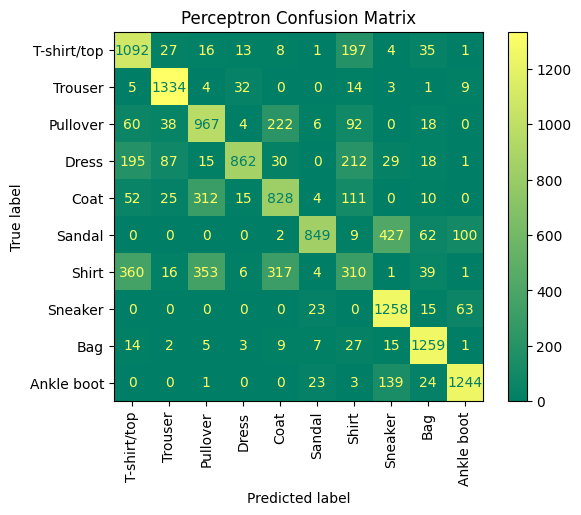

Logistic Regression Accuracy: 80.09%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Figure size 1000x1000 with 0 Axes>

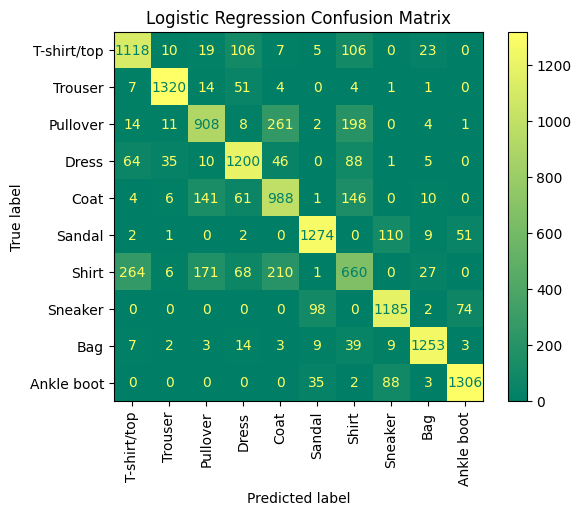

KNN Accuracy: 83.11%


<Figure size 1000x1000 with 0 Axes>

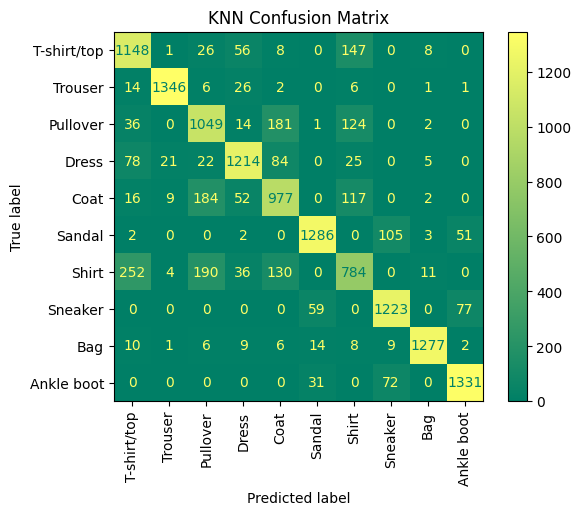

Linear SVM Accuracy: 76.56%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


<Figure size 1000x1000 with 0 Axes>

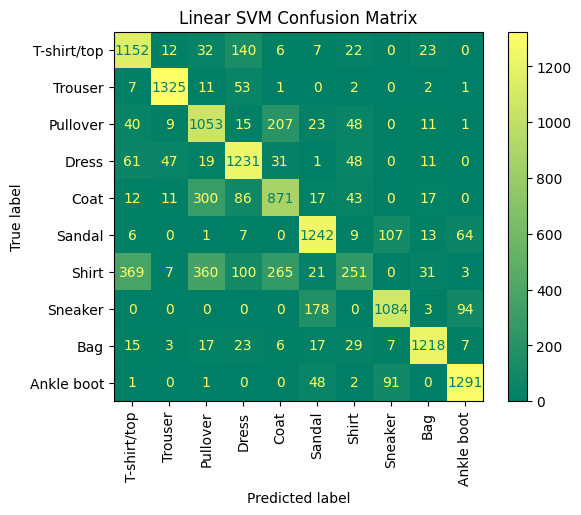

In [ ]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# Transform data into tensors
transform = transforms.Compose([transforms.ToTensor()])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Combine train and test datasets
full_data = torch.utils.data.ConcatDataset([trainset, testset])

# Extract data and labels
data = np.array([np.array(img[0]).flatten() for img in full_data])
labels = np.array([img[1] for img in full_data])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dimensionality using PCA
pca = PCA(n_components=20)  # Adjust n_components based on trade-off between speed and accuracy
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define class labels
classes = trainset.classes

# Function to train model, predict, and display confusion matrix
def evaluate_model(model, model_name):
    # Train the model
    model.fit(X_train_pca, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_pca)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy * 100:.2f}%')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix
    plt.figure(figsize=(10, 10))
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
    disp.plot(xticks_rotation='vertical', cmap='summer')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Initialize models
models = {
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "Linear SVM": LinearSVC()
}

# Evaluate each model
for model_name, model in models.items():
    evaluate_model(model, model_name)


#CNN

finally we implemnt our most complex model CNN and get a accuracy of: 85%

we explore its confsion matrix aswell

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)  # 1 input channel (grayscale), 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)  # 6 input channels, 16 output channels, 5x5 kernel
        self.fc1 = nn.Linear(16 * 4 * 4, 120)  # Adjust input size based on final pooled feature map size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Transform data into tensors and normalize
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load Fashion MNIST dataset
trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False, num_workers=2)

# Initialize CNN model
cnn_model = CNN()

# Define loss function and optimizer for CNN model
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = optim.SGD(cnn_model.parameters(), lr=0.001, momentum=0.9)

# Train the CNN model
epochs = 5
for epoch in range(epochs):
    running_loss = 0.0
    for inputs, labels in trainloader:
        optimizer_cnn.zero_grad()
        outputs = cnn_model(inputs)
        loss = criterion_cnn(outputs, labels)
        loss.backward()
        optimizer_cnn.step()
        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainloader)}')

print('Finished Training')

# Evaluate the CNN model
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = cnn_model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the CNN on the test images: {100 * correct / total:.2f}%')




Epoch 1, Loss: 1.2578072034517924
Epoch 2, Loss: 0.5882655615488688
Epoch 3, Loss: 0.49480144724845887
Epoch 4, Loss: 0.4394776124954224
Epoch 5, Loss: 0.4038701424042384
Finished Training
Accuracy of the CNN on the test images: 84.98%


#evaluation Experiments/Simulation Results

##confusion matrix

<Figure size 1000x1000 with 0 Axes>

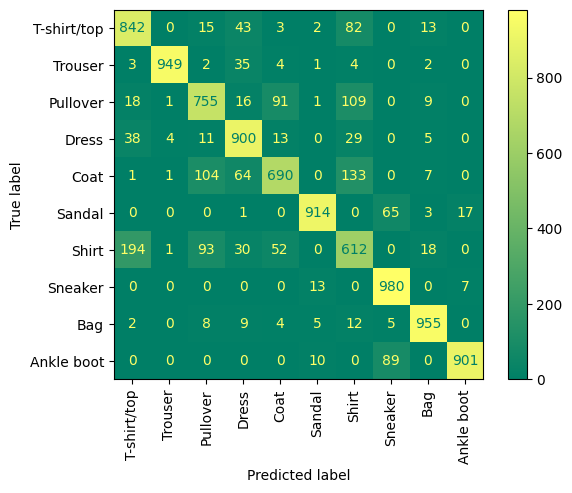

In [ ]:
# Confusion matrix
# Evaluate the CNN model and collect predictions
all_preds = []
all_labels = []
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = cnn_model(inputs)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=trainset.classes)
disp.plot(xticks_rotation='vertical', cmap='summer')
plt.show()


##Probabilitys distribution on testing images

to conclude we go over some examples and see where the model perfoumed well and try to explain places where the model failed

<ipython-input-17-5303a811ce4d>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_row[1].set_xticklabels(labels, rotation=45, ha='right')


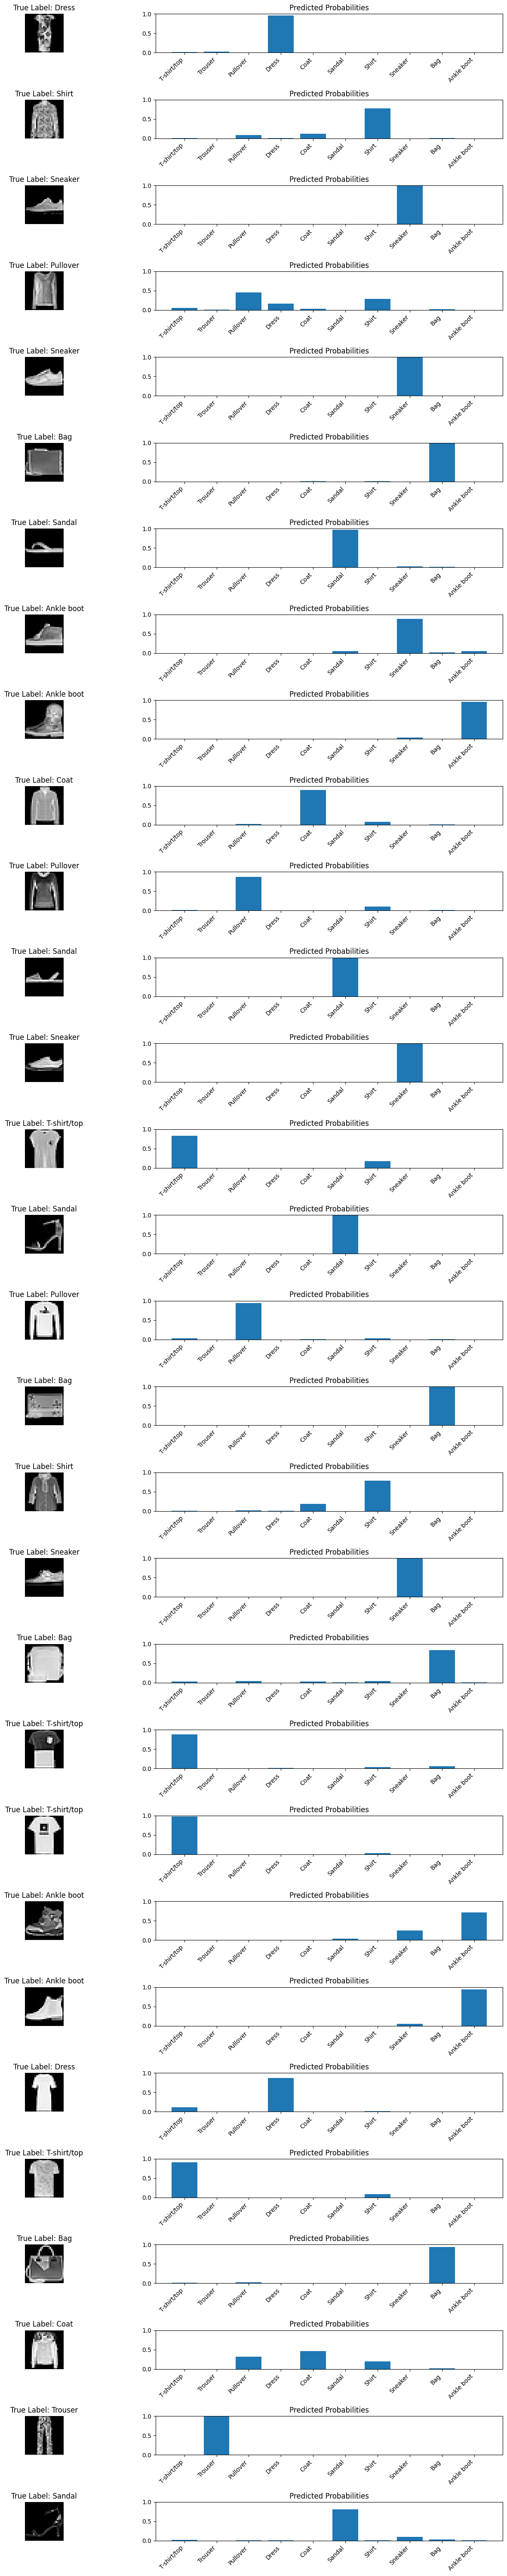

In [ ]:
# Probability distribution on testing images
# Choose an index range of the images you want to test
index_start = 100
index_end = 130  # Number of images to display (30 in this case)

# Define the labels of the dataset
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
          'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Create a subplot with a 5x5 grid of images and their corresponding bar graphs
fig, axes = plt.subplots((index_end - index_start), 2, figsize=(15, 60))

for i, ax_row in enumerate(axes):
    # Fetch the image and label from the test dataset
    my_image, true_label = testset[index_start + i]

    # Convert the image tensor to a numpy array
    my_image_np = my_image.numpy().transpose((1, 2, 0))

    # Plot the image
    ax_row[0].imshow(my_image_np.squeeze(), cmap='gray')
    ax_row[0].set_title(f'True Label: {labels[true_label]}')
    ax_row[0].axis('off')

    # Perform inference on the image
    with torch.no_grad():
        inputs = my_image.unsqueeze(0)  # Add batch dimension
        outputs = cnn_model(inputs)
        probabilities = torch.softmax(outputs, dim=1).squeeze().numpy()

    # Plot the bar graph
    ax_row[1].bar(labels, probabilities)
    ax_row[1].set_title('Predicted Probabilities')
    ax_row[1].set_xticklabels(labels, rotation=45, ha='right')
    ax_row[1].set_ylim([0, 1])

plt.tight_layout()
plt.show()


### Our Qestions

Q1) What is the distribution of the 10 classes in the dataset?

Our dataset is evenyl distributed in the training and testing set as shown in the distribution graph.

Q2) How do simple models perform on this dataset?

Simple models perform relatvily well in regards to a dummy classifier. more over we say that even by using the PCA techniqe we abtain high accuracy results

Q3) Can more complex models improve the classification accuracy?

Yes, we see that our CNN model outperforms this maybe due to the fact that we are working with images where the CNN model takes in to account possitioning therefore it performs better than previouse models

Q4) What are the trade-offs between different models?

We found that SVM was extremly slow in training compared to other simple models
CNN trainig time took more time but has much better results

Q5) What are the most common misclassifications made by the models?

T Shirts and shirts as well as sandals and shoes